In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from vega_datasets import data

In [2]:
vega = data.sf_temps()
vega.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
vega.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


---

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
vega = vega.set_index('date').sort_index()
vega.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

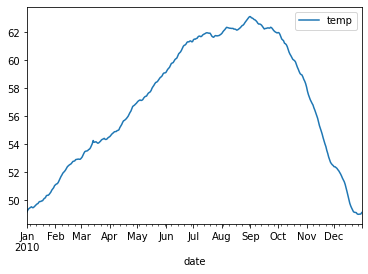

In [5]:
average_temp = vega.resample('D').mean()
average_temp.plot()

---

#### 2.Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

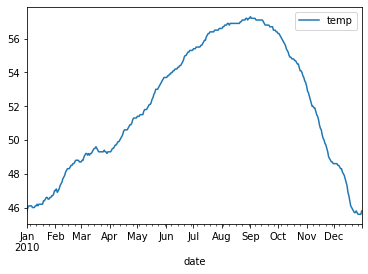

In [6]:
min_temp = vega.resample('D').min()
min_temp.plot()

---

#### 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

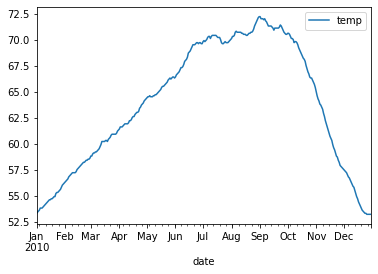

In [7]:
max_temp = vega.resample('D').max()
max_temp.plot()

---

#### 4. Which month is the coldest, on average?

In [8]:
coldest = vega.resample('M').mean()
coldest.idxmin()

temp   2010-01-31
dtype: datetime64[ns]

In [9]:
coldest

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


#### 5. Which month has the highest average temperature?

In [10]:
hot = vega.resample('M').mean()
hot.idxmax()

temp   2010-09-30
dtype: datetime64[ns]

---

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
change_in_temp = vega.resample('D').agg(['min','max'])

In [12]:
change_in_temp['variability'] = change_in_temp[('temp','max')] - change_in_temp[('temp','min')]
change_in_temp.head()

temp       variability
             min   max            
date                              
2010-01-01  45.8  53.3         7.5
2010-01-02  46.0  53.4         7.4
2010-01-03  46.1  53.5         7.4
2010-01-04  46.1  53.6         7.5
2010-01-05  46.1  53.8         7.7

In [13]:
change_in_temp.resample('M').mean().variability.idxmax()

Timestamp('2010-09-30 00:00:00', freq='M')

---

### Bonus: 
#### Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

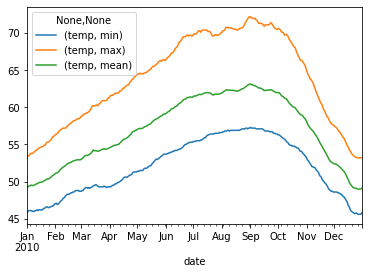

In [14]:
temperature = vega.resample('D').agg(['min','max','mean'])
temperature.plot()

---

### Seattle Weather Data

In [15]:
from vega_datasets import data
df = data.seattle_weather()

#### Which year and month combination has the highest amount of precipitation?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [17]:
df = df.set_index('date').sort_index()

# find highest year and month with precipiation
df.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

---

#### Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Precipitation over time'}, xlabel='date'>

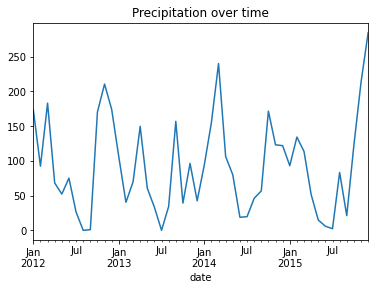

In [18]:
df.resample('M').precipitation.sum().plot(title='Precipitation over time')

---

#### Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Tri-Weekly Average Wind'}, xlabel='date'>

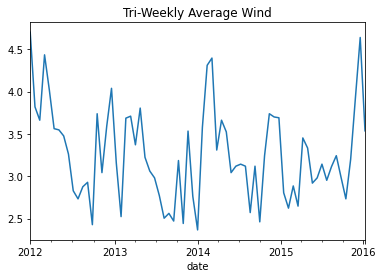

In [19]:
df.resample('3w').wind.mean().plot(title='Tri-Weekly Average Wind')

---

#### Which year-month combination is the windiest?

In [20]:
df.resample('M').wind.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

December 2015 is the windiest month.

---

#### What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [27]:
# Reset the df
df = data.seattle_weather()

# Make a year column
df['year'] = df['date'].dt.year

# Make a sunny weather boolean column
df['is_sunny'] = df.weather =='sun'

# Calulate with a groupby
df.groupby(['year']).is_sunny.sum().sort_values()

year
2012    118
2015    180
2013    205
2014    211
Name: is_sunny, dtype: int64

---

#### In which month does it rain the most?

In [23]:
#　make a month column using datetime
df['month'] = df.date.dt.month

# make a rainy weather 
df['is_rainy'] = df.weather == 'rain'

In [26]:
df.groupby([])

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'